### Cleaning

In [1]:
import pandas as pd, numpy as np, sklearn as skl, seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("once")

In [4]:
train = pd.read_csv(r"C:\Users\user\Documents\Research\Data Projects\Machine Learning\assignment 4\train.csv", header=0)
test = pd.read_csv(r"C:\Users\user\\Documents\Research\Data Projects\Machine Learning\assignment 4\test.csv", header=0)

In [5]:
missing = []
for x in range(0, len(train.columns)):
    missing.append(sum(train.iloc[:,x].isna())/len(train.iloc[:,x]))

In [7]:
more_than_zero = list(filter(lambda x: x > 0, missing))


Looks like 5 variables have missing values. 3 have most missing. One is rent. v18q1 is # of tablets owned. rez_esc is years behind in school.

In [8]:
miss_df = pd.DataFrame({"% na": missing, "names": train.columns})
miss_df[miss_df['% na']>0]

,% na,names
1,0.717798,v2a1
8,0.768233,v18q1
21,0.829549,rez_esc
103,0.000523,meaneduc
140,0.000523,SQBmeaned


Looks like the values for v18q1 are NaN if they don't own a tablet. Let's get rid of the binary variable and just have a variable for how many tablets they own. We'll drop the other ones that have really high proportion of missing and those that have a low propotion of missing fill with the mean

In [88]:
print(pd.crosstab(train.v18q1,train.v18q))
train.v18q.describe()
train.v18q1 = train.v18q1.replace(np.NaN,0)
train.meaneduc = train.meaneduc.fillna(np.mean(train.meaneduc))
train.SQBmeaned = train.meaneduc.fillna(np.mean(train.SQBmeaned))
train = train.drop(columns=['v18q','v2a1', 'rez_esc'])

test.v18q1 = test.v18q1.replace(np.NaN,0)
test.meaneduc = test.meaneduc.fillna(np.mean(test.meaneduc))
test.SQBmeaned = test.meaneduc.fillna(np.mean(test.SQBmeaned))
test = test.drop(columns=['v18q','v2a1', 'rez_esc'])



In [9]:
#testing what percent are missing from heads of housholds. Looks like its about the same percent for the dataset in total
print(sum(train[train.parentesco1==1].v2a1.isna())/len(train[train.parentesco1==1].v2a1.isna())) # same ratio for rent
print(sum(train[train.parentesco1==1].rez_esc.isna())/len(train[train.parentesco1==1].rez_esc.isna())) #almost all for
#"rez esc"



0.7251934073326606
0.9996636394214599


In [28]:
pd.options.display.max_columns=150
train.describe()

,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,0.038087,4.955530,0.023648,0.994768,0.957623,0.325416,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.100555,0.181647,0.017056,0.082243,0.102124,0.284608,0.975306,2.821492,0.587632,0.092707

In [11]:
pd.set_option('max_info_columns', 150)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 143 columns):
Id                 9557 non-null object
v2a1               2697 non-null float64
hacdor             9557 non-null int64
rooms              9557 non-null int64
hacapo             9557 non-null int64
v14a               9557 non-null int64
refrig             9557 non-null int64
v18q               9557 non-null int64
v18q1              2215 non-null float64
r4h1               9557 non-null int64
r4h2               9557 non-null int64
r4h3               9557 non-null int64
r4m1               9557 non-null int64
r4m2               9557 non-null int64
r4m3               9557 non-null int64
r4t1               9557 non-null int64
r4t2               9557 non-null int64
r4t3               9557 non-null int64
tamhog             9557 non-null int64
tamviv             9557 non-null int64
escolari           9557 non-null int64
rez_esc            1629 non-null float64
hhsize             9557 non

In [83]:
np.mean(train.parentesco1)

0.31108088312231874

In [97]:
print(np.mean(train.parentesco1)*len(train.idhogar),"total heads of house")
print(len(train.idhogar.unique()),"unique households")

2973.0 total heads of house
2988 unique households


Looks like most of the variables are at the household level, so there are huge redundancies in the data. This violates the independence of obseration assumption. For many of the variables, they are identical across different members of the household. Because only head of house will be scored, we will just keep those that are head of house.

In [7]:
train_heads = train[train.parentesco1==1]

Looks like over half of the people are not vulnerable, about 10% are at greatest poverty levels

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


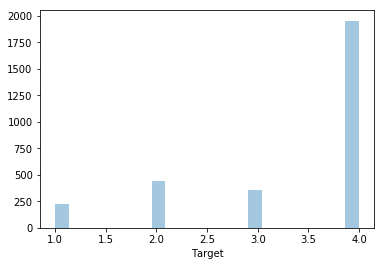

In [106]:
sns.distplot(train_heads['Target'], kde=False)


In [8]:
X_train=train_heads.drop(columns=['Target']).select_dtypes(['int64','float64'])
y_train = train_heads.Target

Below we show the household type distribution. The mode is at 3, but there seems to be a good variety in family size

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


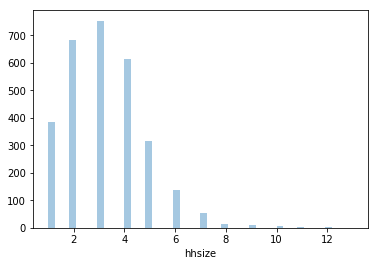

In [14]:
sns.distplot(X_train.hhsize, kde=False)


Here, we create a test set within our training set to evaluate how our model does on different metrics. Normally we will be using cross-validation, but that just examines f1. This will allow us to train our best model on 2/3rds of the data, and then get predictions for the remaining 1/3rd

In [73]:
length = len(X_train)
split=round(.67*length)
secondtrain = X_train.iloc[:split,]
second_ytrain = y_train.iloc[:split,]
secondtest = X_train.iloc[split:,]
second_ytest = y_train.iloc[split:,]


1992


### Modeling

##### SVC

In [9]:
from sklearn.svm import SVC
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

Initially we tried the parameters c = .05-.15, gamma=.5-1.5. The best were .05 and .5. So in the second iteration, I used .01, .03, .05 and .1, .3, .5. F1 Score was .198295 in the first iteration. Looks like its about the same in the second one

In [78]:
warnings.filterwarnings("ignore")
clf = SVC()
gridsearch = GridSearchCV(clf, {"C": [0.01, 0.03, 0.05], "kernel": ['rbf'], 'gamma': [.1, .3, .5]}, scoring='f1_macro')
gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
print("Test Accuracy: {}".format(gridsearch.best_score_))

Best Params: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.19829508513222638


##### Decision Tree

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier


In [42]:
depths = range(1,16)
clf = DecisionTreeClassifier()
gridtree = GridSearchCV(clf, {"max_depth": depths,"class_weight":["balanced",None] }, scoring='f1_macro',cv=5)
gridtree.fit(X_train, y_train)
gridtree.best_params_

{'class_weight': 'balanced', 'max_depth': 15}

In [87]:
params_df = pd.DataFrame({"params": gridtree.cv_results_['params'],
"test score": gridtree.cv_results_['mean_test_score'],
"train score": gridtree.cv_results_['mean_train_score']})
weight = []
depth=[]
for x in range(0,len(params_df['params'])):
    weight.append(params_df['params'][x]['class_weight'])
params_df['weight']=weight
for x in range(0,len(params_df['params'])):
    depth.append(params_df['params'][x]['max_depth'])
params_df['depth']=depth
#params_df['weight']=params_df['weight'].replace(None,'not balanced')
params_df['weight'].loc[params_df['weight']!="balanced"]="not balanced"




C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


This plots the training and test scores against each other, for both balanced and not balanced parameters. As is common with decision trees, having high depth leads to serious overfitting problems. Let's take a closer look at the testing scores

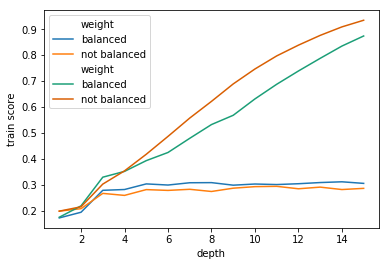

In [88]:
sns.lineplot(x=params_df['depth'], y=params_df['test score'], hue=params_df['weight'], pallete="Dark1")

sns.lineplot(x=params_df['depth'], y=params_df['train score'], hue=params_df['weight'],palette="Dark2")

Looks like this cell shows that there may be a gradual improvement after 5, but most of the improvement is up to 5. Also, balanced classes consistently outperforms unbalanced classes

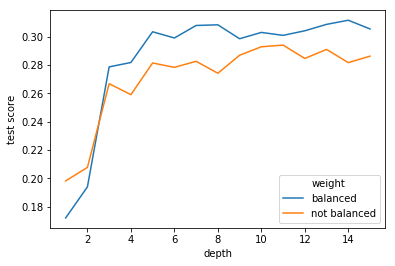

In [89]:
sns.lineplot(x=params_df['depth'], y=params_df['test score'], hue=params_df['weight'], pallete="Dark1")


Let's take a look at what this decision tree looks like.

The first node splits depending on education. Looks like it mostly splits into those classified as not at risk, and then a set that includes both at risk and not at risk still pretty evently (with weighting)

The next splits are on eviv3 (floors are good quality) and overcrowding (# of people per room). eviv3 doesn't seem to reduce impurity very much, but overcrowding does a better job. The latter essentially says where there is not overcrowding there is even a higher concentration of not at risk people relative to poorer people

This information may prove useful in interpretting a random forest. We can probably safely assume that if a feature is important in the random forest, it will split in the same direction


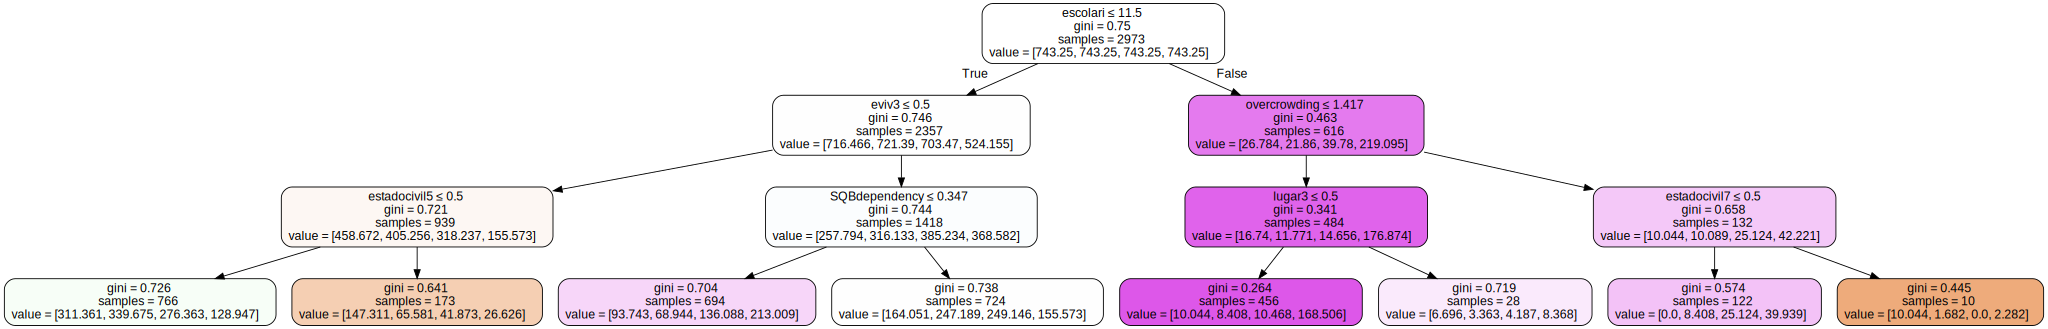

In [31]:
clftree = DecisionTreeClassifier(class_weight="balanced",max_depth=3)
clfoutput = clftree.fit(X_train, y_train)
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clfoutput, out_file=None, 
                      feature_names=X_train.columns,   
                     filled=True, rounded=True,  
                   special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

##### Random Forest

First, we will do a hyperparameter search for random forest. It may be that combining trees may have different optimal levels of depth or balance compared to a decision tree

In [12]:
clf = RandomForestClassifier(oob_score=True)
randomsearch = RandomizedSearchCV(clf, {"max_depth": [2,5,10,15], "n_estimators": [50,200,1000], 'class_weight': ['balanced', None]}, scoring='f1_macro', n_iter=8, cv=3)
randomsearch.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classi

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=8, n_jobs=None,
          param_distributions={'max_depth': [2, 5, 10, 15], 'n_estimators': [50, 200, 1000], 'class_weight': ['balanced', None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1_macro', verbose=0)

In [15]:
print(randomsearch.best_params_)
randomsearch.best_score_

{'n_estimators': 1000, 'max_depth': 5, 'class_weight': 'balanced'}


0.3478403912384481

In [63]:
gridsearchrf = GridSearchCV(clf, {"max_depth": [4,5,6,7], "n_estimators": [1000,2000,10000], 'class_weight': ['balanced']}, scoring='f1_macro', cv=5)
gridsearchrf.fit(X_train, y_train)
gridsearchrf.best_score_

0.3812889480830857

In [69]:
print(gridsearchrf.best_params_)
gridsearchrf.cv_results_

{'class_weight': 'balanced', 'max_depth': 6, 'n_estimators': 10000}


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

{'mean_fit_time': array([ 6.11222529, 12.92331309, 61.80652113,  7.10009007, 14.25316062,
        70.72606411,  7.63313398, 15.31887059, 81.59102502,  9.034725  ,
        17.24013472, 99.41679454]),
 'std_fit_time': array([ 0.55778656,  1.32428977,  2.21340272,  0.36447361,  0.63821932,
         2.05344826,  0.3828679 ,  0.63581491,  3.52844424,  0.40414945,
         0.69113909, 21.80221826]),
 'mean_score_time': array([0.46037788, 1.09919276, 5.52849283, 0.61461935, 1.11119266,
        6.28888311, 0.46838236, 1.35137472, 7.76207328, 0.81515427,
        1.30301356, 9.13419762]),
 'std_score_time': array([0.03895444, 0.26177052, 0.60307242, 0.13078336, 0.12853464,
        0.71063581, 0.00907243, 0.33336659, 1.15609261, 0.24603754,
        0.30301045, 1.94558032]),
 'param_class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced'],

This is the distribution of predictions. Looks like the model is more likely to predict poverty than the number in the data. This is because f1 macro seems to weight each f1 easily. This is important to know: our test is more likely to give someone assistance who doesn't need it, but is less likely to miss someone who does

In [58]:
predictions = pd.Series(randomsearch.predict(X_train))
predictions.value_counts()

4    1451
3     637
1     447
2     438
dtype: int64

### Evaluation


#### Examining different metrics

Below, we see how our model does on independent data using the other metrics. Though the best model had a max depth of 6 and 10000 trees, one with a max depth of 5 and 1000 trees performed equally well. It is much simpler so we will go with this one. We train on 2/3rds and test on the remaining 1/3rd

In [96]:
clf = RandomForestClassifier(max_depth=5, n_estimators=1000, class_weight="balanced")
clf.fit(secondtrain, second_ytrain)
predictions = pd.Series(clf.predict(secondtest))

In [97]:
print(classification_report(second_ytest, predictions))

              precision    recall  f1-score   support

           1       0.21      0.49      0.30       111
           2       0.35      0.26      0.30       203
           3       0.18      0.39      0.24       137
           4       0.84      0.43      0.57       530

   micro avg       0.40      0.40      0.40       981
   macro avg       0.40      0.39      0.35       981
weighted avg       0.58      0.40      0.44       981



Overall, we only have a f1 average of .35. The model doesn't perform well, but this may be something that is difficult to predict. In reference, this number is similar to the kaggle benchmark for a random forest


Looks like the model performs best with classifying non-vulnerable people, but not very well with the other classes. Precision is particularly bad for the lower classes: only 18 to 35% of the people identified in each lower class actually belong in those classes. Precision is good for the upper class, but probably because it is the largest. 84% of those identified in the high class actually belong there

Recall is slightly better, and non-vulnerable class performs no better. Here, it varies from 26% to 49%, meaning that percentage of those in the class are identified.

For class 1, the most vulnerable, we are able to correctly identify 49% of them, though there are many people we identify in that class that actually are not. If we are okay giving welfare to those who may not need it as badly and are more concerned about missing someone, leaning on the side of high recall low precision may be the way to go

#### Performance on different subsets
Below, we try to identify different subsets that may be relevant and see how the model performs. In summary

HS Education: f1 macro = 0.24
Less than HS: f1 macro = 0.32
Both large and small families (>3, <=3) perform similar to the baseline (about .35)
Regions vary in performance

In [113]:
hsgrads = train_heads.iloc[split:,][train_heads['escolari']>11]
hsgrads_X = hsgrads.drop(columns=['Target']).select_dtypes(['int64','float64'])
hsgrads_y = hsgrads.Target
predictions = pd.Series(clf.predict(hsgrads_X))
print(classification_report(hsgrads_y, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.91      1.00      0.95        96

   micro avg       0.91      0.91      0.91       106
   macro avg       0.23      0.25      0.24       106
weighted avg       0.82      0.91      0.86       106



In [114]:
nothsgrads = train_heads.iloc[split:,][train_heads['escolari']<=11]
nothsgrads_X = nothsgrads.drop(columns=['Target']).select_dtypes(['int64','float64'])
nothsgrads_y = nothsgrads.Target
predictions = pd.Series(clf.predict(nothsgrads_X))
print(classification_report(nothsgrads_y, predictions))

              precision    recall  f1-score   support

           1       0.21      0.50      0.30       109
           2       0.35      0.27      0.30       200
           3       0.18      0.41      0.25       132
           4       0.80      0.31      0.44       434

   micro avg       0.34      0.34      0.34       875
   macro avg       0.38      0.37      0.32       875
weighted avg       0.53      0.34      0.36       875



In [117]:
smallfam = train_heads.iloc[split:,][train_heads['hhsize']<=3]
smallfam_X = smallfam.drop(columns=['Target']).select_dtypes(['int64','float64'])
smallfam_y = smallfam.Target
predictions = pd.Series(clf.predict(smallfam_X))
print(classification_report(smallfam_y, predictions))

              precision    recall  f1-score   support

           1       0.20      0.40      0.26        67
           2       0.38      0.20      0.26       113
           3       0.18      0.58      0.28        72
           4       0.85      0.43      0.57       355

   micro avg       0.40      0.40      0.40       607
   macro avg       0.40      0.41      0.34       607
weighted avg       0.61      0.40      0.45       607



In [146]:
bigfam = train_heads.iloc[split:,][train_heads['hhsize']>3]
bigfam_X = bigfam.drop(columns=['Target']).select_dtypes(['int64','float64'])
bigfam_y = bigfam.Target
predictions = pd.Series(clf.predict(bigfam_X))
print(classification_report(bigfam_y, predictions))


              precision    recall  f1-score   support

           1       0.24      0.61      0.34        44
           2       0.33      0.33      0.33        90
           3       0.16      0.18      0.17        65
           4       0.82      0.43      0.57       175

   micro avg       0.39      0.39      0.39       374
   macro avg       0.39      0.39      0.35       374
weighted avg       0.52      0.39      0.41       374



Below we run the model separately for each region (region 1 had no observations for some classes and was excluded). The best performing region was Brunca (region 4), while the worst were Chorotega and Pacifica Central (Regions 2 and 3)

In [144]:
for x in range(2,7):
    place = "lugar"+str(x)
    region = train_heads.iloc[split:,][train_heads[place]==1]
    region_X = region.drop(columns=['Target']).select_dtypes(['int64','float64'])
    region_y = region.Target
    predictions = pd.Series(clf.predict(region_X))
    print("Region"+str(x)+ " has an F1 macro of {}".format(round(f1_score(region_y, predictions,average='macro'),3)))

Region2 has an F1 macro of 0.29
Region3 has an F1 macro of 0.294
Region4 has an F1 macro of 0.398
Region5 has an F1 macro of 0.355
Region6 has an F1 macro of 0.351


##### Feature Importance 

Here, we see the features sorted by importance. The set of most important features all have to do with education. They probably were all used independently (I doubt they were in the same model). 

SQBdependency (proportion of the household under 19) and SQBedjefe (education of head of household) are the next most important. However, because we are splitting, I believe squared variables should perform the same as its linear equivalent

Finally, there are is a long set of features that has some, but relatively small importance. This includes things like age, eviv3 (good flooring), hogar_nin (number of children), v18q1 (# of tablets the household owns), and overcrowding

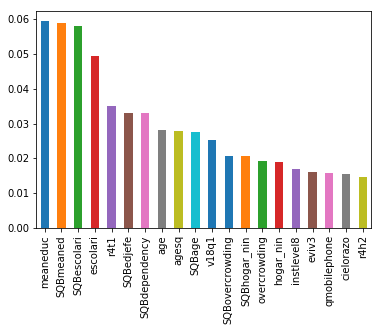

In [76]:

feature_imp = sorted(list(zip(X_train.columns, clf.feature_importances_)), key=lambda x: x[1], reverse=True)

pd.Series([x[1] for x in feature_imp[0:20]], index=[x[0] for x in feature_imp[0:20]]).plot(kind='bar')


This graph shows all of the features, not just the top 20, to get an idea of how feature importance tapers off. Looks like it starts to taper off gradually, but these 20 still may be important

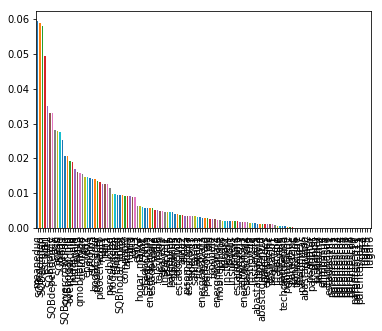

In [77]:
pd.Series([x[1] for x in feature_imp], index=[x[0] for x in feature_imp]).plot(kind='bar')


This creates the test predictions to submit

In [89]:
X_test=test.select_dtypes(['int64','float64'])
predictions = pd.DataFrame(randomsearch.predict(X_test))
predictions.columns=['predictions']
predictions
train_withpreds = pd.concat([predictions, test], axis=1)
idpreds = train_withpreds[['Id','predictions']]

In [145]:
idpreds.to_csv

<bound method DataFrame.to_csv of                  Id  predictions
0      ID_2f6873615            4
1      ID_1c78846d2            4
2      ID_e5442cf6a            4
3      ID_a8db26a79            4
4      ID_a62966799            4
5      ID_e77d38d45            4
6      ID_3c5f4bd51            4
7      ID_a849c29bd            4
8      ID_472fa82da            4
9      ID_24864adcc            4
10     ID_247909995            4
11     ID_fbe8d0909            4
12     ID_8ed30c46a            4
13     ID_c8809fe15            4
14     ID_b726eb052            4
15     ID_3533dffe1            4
16     ID_67a331b9f            4
17     ID_67c4a6bb6            4
18     ID_8228c6a2e            4
19     ID_d54f1a82e            4
20     ID_a39d40b54            4
21     ID_748724edb            4
22     ID_8be4c9bbf            4
23     ID_7bade887b            2
24     ID_13f752d2b            4
25     ID_a9bff86ae            4
26     ID_04d3ee180            4
27     ID_47e48cb8f            4
28     ID